In [1]:
# Base library imports
import colorsys
import os
import re

# Module imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Quick pathfix required before loading project resources
try:
    notebook_location
except NameError:
    notebook_location = os.getcwd()
    os.chdir(re.sub(r'(DSC672)[\\/].*', r'\1', notebook_location))

# Project imports (none just yet)

In [2]:
def display_full_df(df):
    """
    Utility function to display a data frame in full
    """
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
        display(df)


def create_hist_agg(prefix, bins):
    """
    Utility function to aggregate histogram data
    """
    result = dict()
    for i in range(bins):
        result['%s%s' % (prefix, i)] = 'sum'
    return result


def create_hue_colors(bins, s=1., v=1.):
    """
    Utility function to create a list of colors in the HSV space stepping the H value
    from zero to one given the number of bins, S-value, and V-value.
    """
    colors = list()
    for i in range(bins):
        rgb_float = colorsys.hsv_to_rgb(float(i * 8)/255., s, v)
        rgb = [0, 0, 0]
        rgb[0] = int(rgb_float[0]*255)
        rgb[1] = int(rgb_float[1]*255)
        rgb[2] = int(rgb_float[2]*255)
        colors.append('#%02x%02x%02x' % (rgb[0], rgb[1], rgb[2]))
    return colors

## Quick Preview of the Training and Testing Data Summaries

In [3]:
data_summary_df = pd.read_csv('temp_data/summary.csv')
display(data_summary_df)

d:\repos\depaul\dsc672\venv\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tile_id,catalog,size,collection,map,tile,x,y,zoom,building_pixels,...,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31
0,sample_lg_nia_825a50_0,sample_lg,256,nia,825a50,0,530126,484345,20,0,...,99,69,93,99,128,144,118,83,27,63
1,sample_lg_nia_825a50_100,sample_lg,256,nia,825a50,100,530138,484354,20,0,...,364,402,385,484,760,1319,2132,2473,685,116
2,sample_lg_nia_825a50_101,sample_lg,256,nia,825a50,101,530121,484355,20,0,...,66,96,128,157,167,62,26,14,21,23
3,sample_lg_nia_825a50_102,sample_lg,256,nia,825a50,102,530122,484355,20,0,...,2123,2164,2038,2041,2173,2333,1956,699,126,74
4,sample_lg_nia_825a50_103,sample_lg,256,nia,825a50,103,530123,484355,20,0,...,2828,3341,4081,3979,4428,4559,3128,1689,294,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343165,tier2_lg_nia_b80615_997,tier2_lg,256,nia,b80615,997,530537,484703,20,23555,...,2145,3293,7006,9229,7096,1734,293,37,7,0
343166,tier2_lg_nia_b80615_998,tier2_lg,256,nia,b80615,998,530538,484703,20,4982,...,3476,4554,3774,4042,5524,2717,380,91,15,0
343167,tier2_lg_nia_b80615_999,tier2_lg,256,nia,b80615,999,530539,484703,20,0,...,2046,2753,3618,7070,8137,1665,132,49,2,0
343168,tier2_lg_nia_b80615_99,tier2_lg,256,nia,b80615,99,530518,484669,20,2077,...,631,745,1711,2550,2756,3925,2316,887,242,177


In [4]:
test_data_summary_df = pd.read_csv('temp_data/test_summary.csv')
display(test_data_summary_df)

,tile_id,map,map_pixels,r0,r1,r2,r3,r4,r5,r6,...,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31
0,00022f,00022f,65536,0,0,0,3,0,10,49,...,6991,5603,4617,3991,3594,3214,2654,1224,110,2
1,0002cd,0002cd,65536,0,6,162,1274,2102,2134,1594,...,2122,1935,2821,8594,9849,9469,6709,1330,97,1
2,0008b6,0008b6,65536,0,0,0,0,0,0,0,...,8145,6162,2925,873,210,120,55,29,0,0
3,000e6e,000e6e,65536,0,0,3,404,233,193,181,...,4625,4110,3012,1897,1123,1150,3278,2987,1503,6
4,0020ad,0020ad,65536,0,0,0,0,0,5,220,...,1167,257,96,49,18,6,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11476,ffd0bc,ffd0bc,65536,0,0,111,1056,1795,1643,1520,...,5106,2157,1668,1045,701,695,597,323,266,40
11477,ffe6d2,ffe6d2,65536,0,0,0,0,1,55,833,...,4429,1683,266,5,1,0,0,0,0,0
11478,fff282,fff282,65536,0,0,0,0,0,0,1,...,288,31,3,0,0,0,0,0,0,0
11479,fffd3f,fffd3f,65536,0,0,61,2331,3940,3661,2972,...,2708,1246,918,771,499,317,383,334,428,50


# Building and Map Pixels: Percentage Building Coverage
The first portion of the exploratory analysis focuses on the percentage of pixels in the training data that are classified as buildings.

## Building and Map Pixels Broken Down by Map

In [5]:
map_summary_df = data_summary_df.groupby(['catalog', 'collection', 'map']).agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
map_summary_df['percent_building'] = map_summary_df['building_pixels']['sum'].astype(float) / \
    map_summary_df['map_pixels']['sum'].astype(float)
display_full_df(map_summary_df)

tile map_pixels building_pixels percent_building
                            count        sum             sum                 
catalog   collection map                                                     
sample_lg nia        825a50   567   32560039         1437159         0.044139
tier1     acc        665946   459   25838782         7066809         0.273496
                     a42435   291   16200077         6329031         0.390679
                     ca041a   441   24056291         8156021         0.339039
                     d41d81   428   23610745        10875154         0.460602
          dar        0a4c40  1657  101140143        19559734         0.193392
                     353093   662   38507611         8377766         0.217561
                     a017f9   592   34467491         9617483         0.279031
                     b15fce   720   43303361        20590972         0.475505
          kam        4e7c7f   239   12890311         2435015         0.188903
          mon        207cc7    99    4742924         1609226         0.339290
                     401175   143    7488732         2690281         0.359244
                     493701   116    5964151         1506559         0.252602
                     f15272    86    4004976         2245288         0.560625
          nia        825a50   160    8157085          359385         0.044058
          ptn        abe1a3   276   15105622         4444171         0.294206
                     f49f31   124    6156011         2195143         0.356585
          znz        06f252  1681  102699331         1267819         0.012345
                     076995  1325   84835924          929410         0.010955
                     33cae6  1299   81371902         7907077         0.097172
                     3f8360  1435   89813221         2162538         0.024078
                     425403  1640  102885977          166288         0.001616
                     75cdfa  1681  102861281          469869         0.004568
                     9b8638  1263   78742652         1844803         0.023428
                     aee7fd  1681  102910661          465834         0.004527
                     bc32f1  1640  102746265           34815         0.000339
                     bd5c14  1600  102887343         1361963         0.013237
                     c7415c  1189   73870096         1274919         0.017259
                     e52478   680   41684275           60329         0.001447
tier1_lg  acc        665946  1699  103228090        28267022         0.273831
                     a42435  1075   64706478        25317751         0.391271
                     ca041a  1613   96048095        32621680         0.339639
                     d41d81  1565   94323570        43501211         0.461191
          dar        0a4c40  6384  403753446        78238027         0.193777
                     353093  2502  153890605        33510722         0.217757
                     a017f9  2237  137700522        38470616         0.279379
                     b15fce  2762  173095355        82367136         0.475848
          kam        4e7c7f   870   51460964         9739989         0.189269
          mon        207cc7   343   18912897         6437093         0.340355
                     401175   514   29898880        10761637         0.359934
                     493701   411   23790106         6025935         0.253296
                     f15272   287   15963891         8981514         0.562614
          nia        825a50   567   32560039         1437159         0.044139
          ptn        abe1a3  1007   60401099        17775961         0.294299
                     f49f31   429   24608500         8781718         0.356857
          znz        06f252  6400  410752228         5070144         0.012344
                     076995  5272  339276976         3717878         0.010958
                     33cae6  5110  325386665        31628548         0.097203
                     3f8360  5670  359209124       

## Building and Map Pixels Broken Down by Collection

In [6]:
collection_summary_df = data_summary_df.groupby(['catalog', 'collection']).agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
collection_summary_df['percent_building'] = collection_summary_df['building_pixels']['sum'].astype(float) / \
    collection_summary_df['map_pixels']['sum'].astype(float)
display_full_df(collection_summary_df)

tile  map_pixels building_pixels percent_building
                       count         sum             sum                 
catalog   collection                                                     
sample_lg nia            567    32560039         1437159         0.044139
tier1     acc           1619    89705895        32427015         0.361481
          dar           3631   217418606        58145955         0.267438
          kam            239    12890311         2435015         0.188903
          mon            444    22200783         8051354         0.362661
          nia            160     8157085          359385         0.044058
          ptn            400    21261633         6639314         0.312267
          znz          17114  1067308928        17945664         0.016814
tier1_lg  acc           5952   358306233       129707664         0.362002
          dar          13885   868439928       232586501         0.267821
          kam            870    51460964         9739989         0.189269
          mon           1555    88565774        32206179         0.363641
          nia            567    32560039         1437159         0.044139
          ptn           1436    85009599        26557679         0.312408
          znz          66909  4268592444        71784195         0.016817
tier2     dar          40581  2479420709       617713815         0.249136
          gao           2364   143579454        14732732         0.102610
          kin            229    11483946         1908908         0.166224
          mah           3133   186578068        16100709         0.086295
          nia            535    29321417         4730351         0.161328
tier2_lg  dar         157124  9913497473      2470565220         0.249212
          gao           9110   574011799        58908064         0.102625
          kin            796    45807457         7635731         0.166692
          mah          11971   745551851        64400566         0.086380
          nia           1979   117080781        18921054         0.161607

## Building and Map Pixels Broken Down by Catalog

In [7]:
catalog_summary_df = data_summary_df.groupby(['catalog']).agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
catalog_summary_df['percent_building'] = catalog_summary_df['building_pixels']['sum'].astype(float) / \
    catalog_summary_df['map_pixels']['sum'].astype(float)
display_full_df(catalog_summary_df)

,tile,map_pixels,building_pixels,percent_building
,count,sum,sum,
catalog,,,,
sample_lg,567,32560039,1437159,0.044139
tier1,23607,1438943241,126003702,0.087567
tier1_lg,91174,5752934981,504019366,0.087611
tier2,46842,2850383594,655186515,0.229859
tier2_lg,180980,11395949361,2620430635,0.229944


## Building and Map Pixels For Entire Training Data Set

In [8]:
train_summary_df = data_summary_df.agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
train_summary_df['percent_building'] = train_summary_df['building_pixels']['sum'].astype(float) / \
    train_summary_df['map_pixels']['sum'].astype(float)
display(train_summary_df)

,tile,map_pixels,building_pixels,percent_building
count,343170.0,NaN,NaN,0.181972
sum,NaN,2.147077e+10,3.907077e+09,0.181972


# Pixel Color-Component Analysis

In [9]:
tier_r_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('r', 32))
tier_g_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('g', 32))
tier_b_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('b', 32))
tier_h_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('h', 32))
tier_s_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('s', 32))
tier_v_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('v', 32))

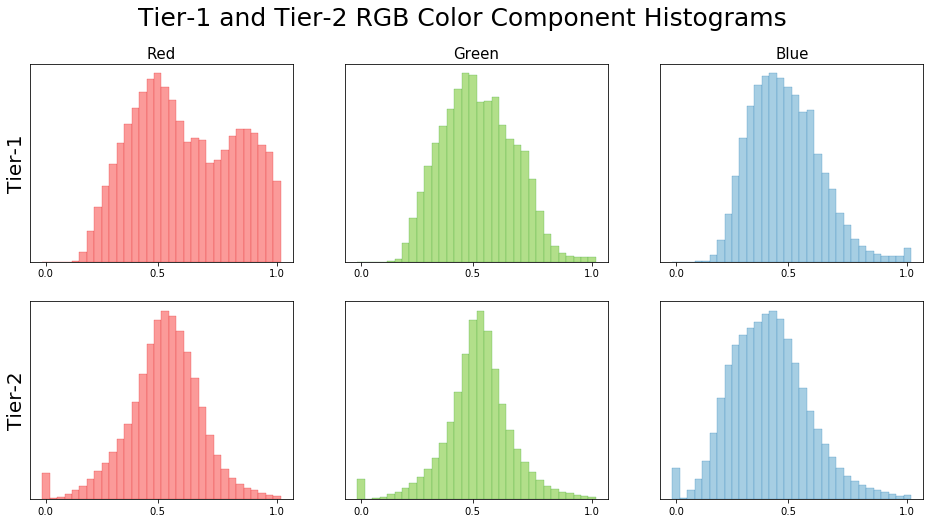

In [10]:
fig, axs = plt.subplots(2,3, figsize=(16,8))
axs[0, 0].set_ylabel('Tier-1', fontsize=20)
axs[0, 0].set_title('Red', fontsize=15)
axs[0, 0].bar(x=range(0,32), height=tier_r_histogram.iloc[0].values, width=1.,
              color='#fb9a99', edgecolor='#e31a1c', linewidth=0.25)
axs[0, 1].set_title('Green', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=tier_g_histogram.iloc[0].values, width=1.,
              color='#b2df8a', edgecolor='#33a02c', linewidth=0.25)
axs[0, 2].set_title('Blue', fontsize=15)
axs[0, 2].bar(x=range(0,32), height=tier_b_histogram.iloc[0].values, width=1.,
              color='#a6cee3', edgecolor='#1f78b4', linewidth=0.25)
axs[1, 0].set_ylabel('Tier-2', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=tier_r_histogram.iloc[1].values, width=1.,
              color='#fb9a99', edgecolor='#e31a1c', linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=tier_g_histogram.iloc[1].values, width=1.,
              color='#b2df8a', edgecolor='#33a02c', linewidth=0.25)
axs[1, 2].bar(x=range(0,32), height=tier_b_histogram.iloc[1].values, width=1.,
              color='#a6cee3', edgecolor='#1f78b4', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Tier-1 and Tier-2 RGB Color Component Histograms', fontsize=25)
plt.show()

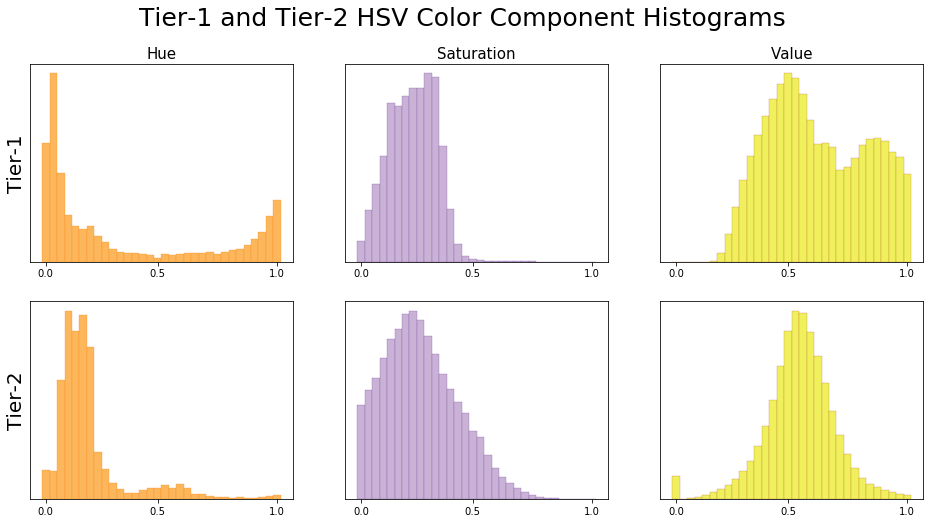

In [11]:
fig, axs = plt.subplots(2,3, figsize=(16,8))
axs[0, 0].set_ylabel('Tier-1', fontsize=20)
axs[0, 0].set_title('Hue', fontsize=15)
axs[0, 0].bar(x=range(0,32), height=tier_h_histogram.iloc[0].values, width=1.,
              color='#fcb75d', edgecolor='#ff7f00', linewidth=0.25)
axs[0, 1].set_title('Saturation', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=tier_s_histogram.iloc[0].values, width=1.,
              color='#cab2d6', edgecolor='#6a3d9a', linewidth=0.25)
axs[0, 2].set_title('Value', fontsize=15)
axs[0, 2].bar(x=range(0,32), height=tier_v_histogram.iloc[0].values, width=1.,
              color='#f0f05d', edgecolor='#b15928', linewidth=0.25)
axs[1, 0].set_ylabel('Tier-2', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=tier_h_histogram.iloc[1].values, width=1.,
              color='#fcb75d', edgecolor='#ff7f00', linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=tier_s_histogram.iloc[1].values, width=1.,
              color='#cab2d6', edgecolor='#6a3d9a', linewidth=0.25)
axs[1, 2].bar(x=range(0,32), height=tier_v_histogram.iloc[1].values, width=1.,
              color='#f0f05d', edgecolor='#b15928', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Tier-1 and Tier-2 HSV Color Component Histograms', fontsize=25)
plt.show()

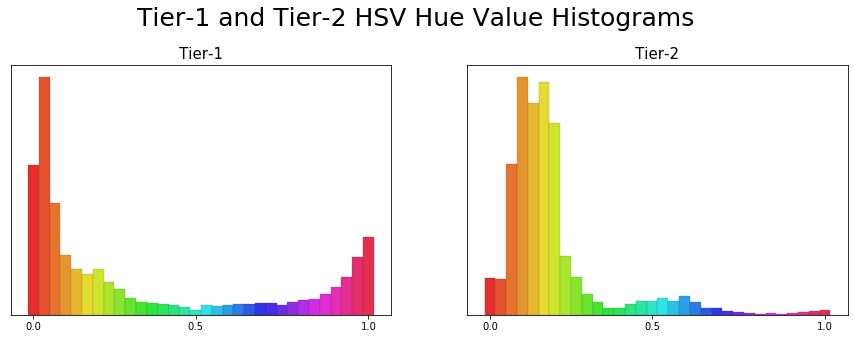

In [12]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].set_title('Tier-1', fontsize=15)
axs[0].bar(x=range(0,32), height=tier_h_histogram.iloc[0].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[1].set_title('Tier-2', fontsize=15)
axs[1].bar(x=range(0,32), height=tier_h_histogram.iloc[1].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Tier-1 and Tier-2 HSV Hue Value Histograms', fontsize=25)
plt.subplots_adjust(top=.82)
plt.show()

In [13]:
train_r_histogram = data_summary_df.agg(create_hist_agg('r', 32))
train_g_histogram = data_summary_df.agg(create_hist_agg('g', 32))
train_b_histogram = data_summary_df.agg(create_hist_agg('b', 32))
train_h_histogram = data_summary_df.agg(create_hist_agg('h', 32))
train_s_histogram = data_summary_df.agg(create_hist_agg('s', 32))
train_v_histogram = data_summary_df.agg(create_hist_agg('v', 32))

In [14]:
test_r_histogram = test_data_summary_df.agg(create_hist_agg('r', 32))
test_g_histogram = test_data_summary_df.agg(create_hist_agg('g', 32))
test_b_histogram = test_data_summary_df.agg(create_hist_agg('b', 32))
test_h_histogram = test_data_summary_df.agg(create_hist_agg('h', 32))
test_s_histogram = test_data_summary_df.agg(create_hist_agg('s', 32))
test_v_histogram = test_data_summary_df.agg(create_hist_agg('v', 32))

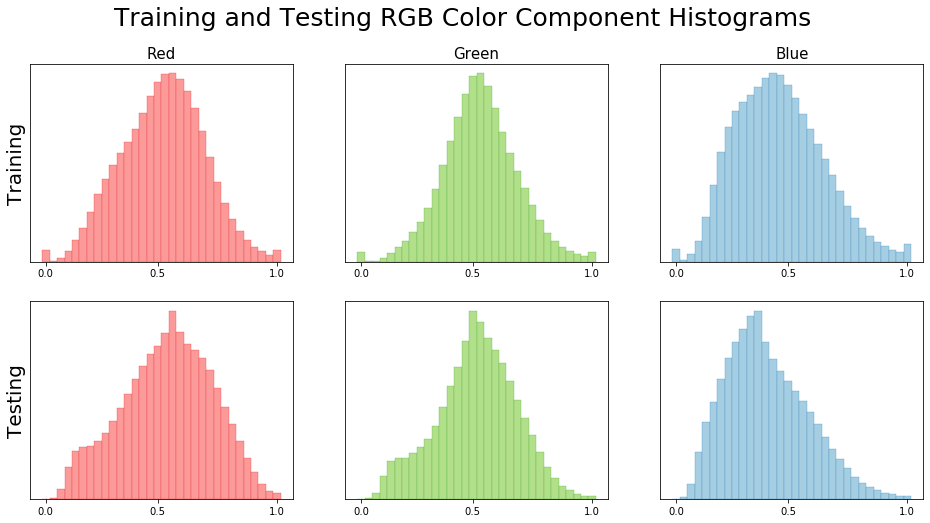

In [15]:
fig, axs = plt.subplots(2,3, figsize=(16,8))
axs[0, 0].set_ylabel('Training', fontsize=20)
axs[0, 0].set_title('Red', fontsize=15)
axs[0, 0].bar(x=range(0,32), height=train_r_histogram.values, width=1.,
              color='#fb9a99', edgecolor='#e31a1c', linewidth=0.25)
axs[0, 1].set_title('Green', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=train_g_histogram.values, width=1.,
              color='#b2df8a', edgecolor='#33a02c', linewidth=0.25)
axs[0, 2].set_title('Blue', fontsize=15)
axs[0, 2].bar(x=range(0,32), height=train_b_histogram.values, width=1.,
              color='#a6cee3', edgecolor='#1f78b4', linewidth=0.25)
axs[1, 0].set_ylabel('Testing', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=test_r_histogram.values, width=1.,
              color='#fb9a99', edgecolor='#e31a1c', linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=test_g_histogram.values, width=1.,
              color='#b2df8a', edgecolor='#33a02c', linewidth=0.25)
axs[1, 2].bar(x=range(0,32), height=test_b_histogram.values, width=1.,
              color='#a6cee3', edgecolor='#1f78b4', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Training and Testing RGB Color Component Histograms', fontsize=25)
plt.show()

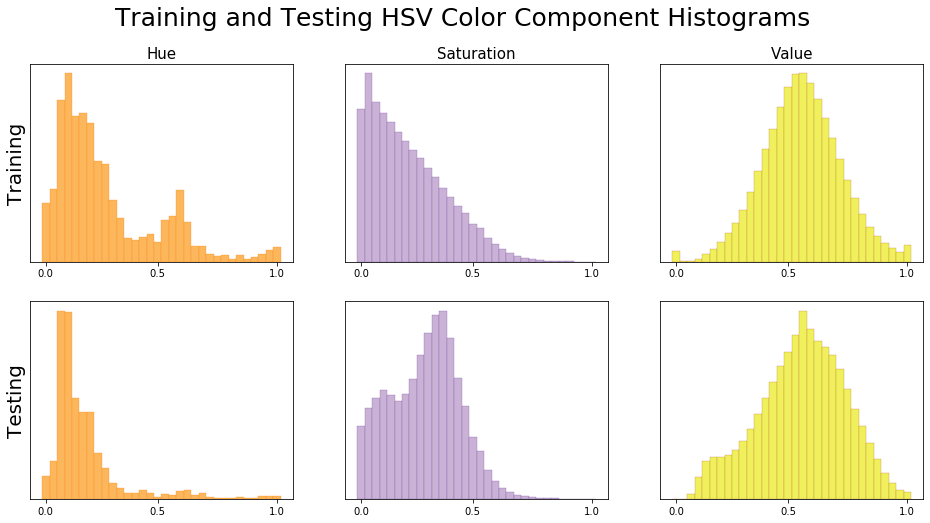

In [16]:
fig, axs = plt.subplots(2,3, figsize=(16,8))
axs[0, 0].set_ylabel('Training', fontsize=20)
axs[0, 0].set_title('Hue', fontsize=15)
axs[0, 0].bar(x=range(0,32), height=train_h_histogram.values, width=1.,
              color='#fcb75d', edgecolor='#ff7f00', linewidth=0.25)
axs[0, 1].set_title('Saturation', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=train_s_histogram.values, width=1.,
              color='#cab2d6', edgecolor='#6a3d9a', linewidth=0.25)
axs[0, 2].set_title('Value', fontsize=15)
axs[0, 2].bar(x=range(0,32), height=train_v_histogram.values, width=1.,
              color='#f0f05d', edgecolor='#b15928', linewidth=0.25)
axs[1, 0].set_ylabel('Testing', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=test_h_histogram.values, width=1.,
              color='#fcb75d', edgecolor='#ff7f00', linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=test_s_histogram.values, width=1.,
              color='#cab2d6', edgecolor='#6a3d9a', linewidth=0.25)
axs[1, 2].bar(x=range(0,32), height=test_v_histogram.values, width=1.,
              color='#f0f05d', edgecolor='#b15928', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Training and Testing HSV Color Component Histograms', fontsize=25)
plt.show()

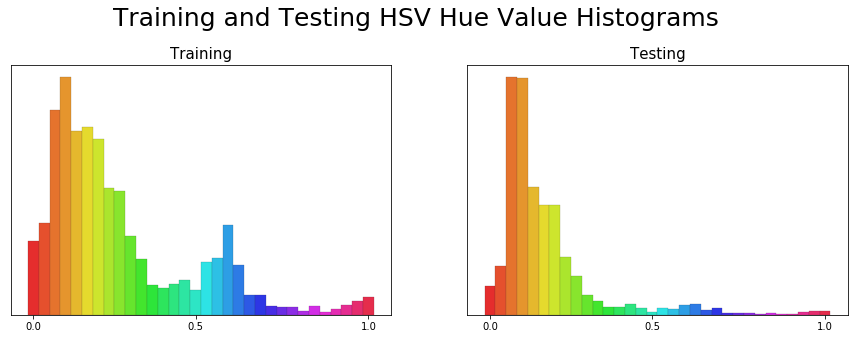

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].set_title('Training', fontsize=15)
axs[0].bar(x=range(0,32), height=train_h_histogram.values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[1].set_title('Testing', fontsize=15)
axs[1].bar(x=range(0,32), height=test_h_histogram.values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Training and Testing HSV Hue Value Histograms', fontsize=25)
plt.subplots_adjust(top=.82)
plt.show()

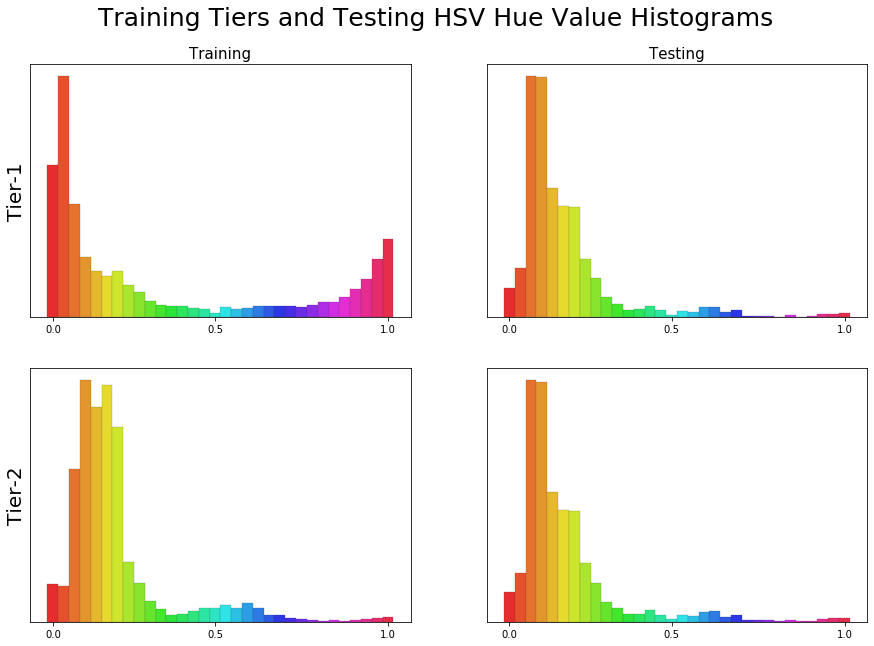

In [18]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
axs[0, 0].set_title('Training', fontsize=15)
axs[0, 0].set_ylabel('Tier-1', fontsize=20)
axs[0, 0].bar(x=range(0,32), height=tier_h_histogram.iloc[0].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[0, 1].set_title('Testing', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=test_h_histogram.values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[1, 0].set_ylabel('Tier-2', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=tier_h_histogram.iloc[1].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=test_h_histogram.values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Training Tiers and Testing HSV Hue Value Histograms', fontsize=25)
plt.subplots_adjust(top=.90)
plt.show()

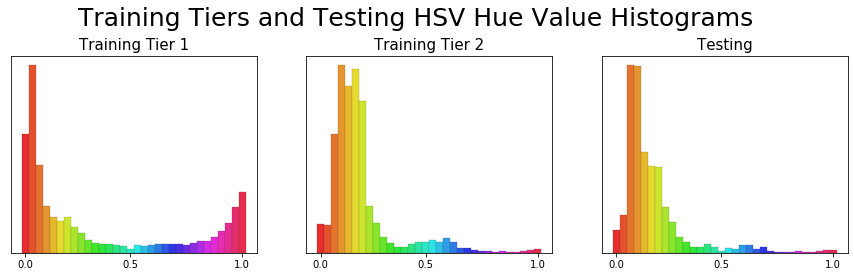

In [19]:
fig, axs = plt.subplots(1,3, figsize=(15,4))
axs[0].set_title('Training Tier 1', fontsize=15)
axs[0].bar(x=range(0,32), height=tier_h_histogram.iloc[0].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[1].set_title('Training Tier 2', fontsize=15)
axs[1].bar(x=range(0,32), height=tier_h_histogram.iloc[1].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[2].set_title('Testing', fontsize=15)
axs[2].bar(x=range(0,32), height=test_h_histogram.values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Training Tiers and Testing HSV Hue Value Histograms', fontsize=25)
plt.subplots_adjust(top=.81)
plt.show()